In [1]:
import  sklearn
import sklearn.cluster as cluster
import sklearn.mixture as mixture
cluster.__all__,mixture.__all__

(['AffinityPropagation',
  'AgglomerativeClustering',
  'Birch',
  'DBSCAN',
  'OPTICS',
  'cluster_optics_dbscan',
  'cluster_optics_xi',
  'compute_optics_graph',
  'KMeans',
  'FeatureAgglomeration',
  'MeanShift',
  'MiniBatchKMeans',
  'SpectralClustering',
  'affinity_propagation',
  'dbscan',
  'estimate_bandwidth',
  'get_bin_seeds',
  'k_means',
  'kmeans_plusplus',
  'linkage_tree',
  'mean_shift',
  'spectral_clustering',
  'ward_tree',
  'SpectralBiclustering',
  'SpectralCoclustering'],
 ['GaussianMixture', 'BayesianGaussianMixture'])

In [2]:
import pandas as pd
xigua40 = pd.read_csv('xigua4.0.csv',index_col=0)
x = xigua40[['密度','含糖率']].values
x

array([[0.697, 0.46 ],
       [0.774, 0.376],
       [0.634, 0.264],
       [0.608, 0.318],
       [0.556, 0.215],
       [0.403, 0.237],
       [0.481, 0.149],
       [0.437, 0.211],
       [0.666, 0.091],
       [0.243, 0.267],
       [0.245, 0.057],
       [0.343, 0.099],
       [0.639, 0.161],
       [0.657, 0.198],
       [0.36 , 0.37 ],
       [0.593, 0.042],
       [0.719, 0.103],
       [0.359, 0.188],
       [0.339, 0.241],
       [0.282, 0.257],
       [0.748, 0.232],
       [0.714, 0.346],
       [0.483, 0.312],
       [0.478, 0.437],
       [0.525, 0.369],
       [0.751, 0.489],
       [0.532, 0.472],
       [0.473, 0.376],
       [0.725, 0.445],
       [0.446, 0.459]])

In [3]:
N=5

In [4]:
model = cluster.KMeans(n_clusters=N)
model.fit(x)
x_predict = model.predict(x)
x_predict

array([0, 0, 4, 4, 4, 1, 1, 1, 2, 1, 1, 1, 2, 4, 3, 2, 2, 1, 1, 1, 4, 0,
       3, 3, 3, 0, 3, 3, 0, 3])

In [9]:
model = mixture.GaussianMixture(n_components=N)
model.fit(x)
x_predict = model.predict(x)
x_predict

array([0, 0, 2, 2, 2, 4, 4, 4, 2, 4, 1, 1, 2, 2, 3, 2, 2, 4, 4, 4, 2, 0,
       3, 3, 3, 0, 3, 3, 0, 3], dtype=int64)

In [12]:
import numpy as np
def disp_pos_neg(model, disp_scale=1000.0):
    disp_input = []
    for i in range(int(disp_scale)):
        for j in range(int(disp_scale)):
            disp_input.append([i/disp_scale,j/disp_scale])
    disp_predict = model.predict(disp_input)
    disp_by_group = [[] for i in range(N)]
    for input_x, disp_x in zip(disp_input, disp_predict):
        disp_by_group[disp_x].append(input_x)
    disp_by_group_np = []
    for group in disp_by_group:
        disp_by_group_np.append(np.array(group))
    return disp_by_group_np

disp_by_group_np = disp_pos_neg(model)
disp_by_group_np

[array([[0.631, 0.717],
        [0.632, 0.695],
        [0.632, 0.696],
        ...,
        [0.872, 0.54 ],
        [0.872, 0.541],
        [0.872, 0.542]]),
 array([[0.09 , 0.   ],
        [0.091, 0.   ],
        [0.092, 0.   ],
        ...,
        [0.445, 0.142],
        [0.445, 0.143],
        [0.446, 0.143]]),
 array([[0.   , 0.81 ],
        [0.   , 0.811],
        [0.   , 0.812],
        ...,
        [0.999, 0.997],
        [0.999, 0.998],
        [0.999, 0.999]]),
 array([[0.   , 0.   ],
        [0.   , 0.001],
        [0.   , 0.002],
        ...,
        [0.642, 0.456],
        [0.642, 0.457],
        [0.642, 0.458]]),
 array([[0.   , 0.2  ],
        [0.   , 0.201],
        [0.   , 0.202],
        ...,
        [0.539, 0.149],
        [0.539, 0.15 ],
        [0.539, 0.151]])]

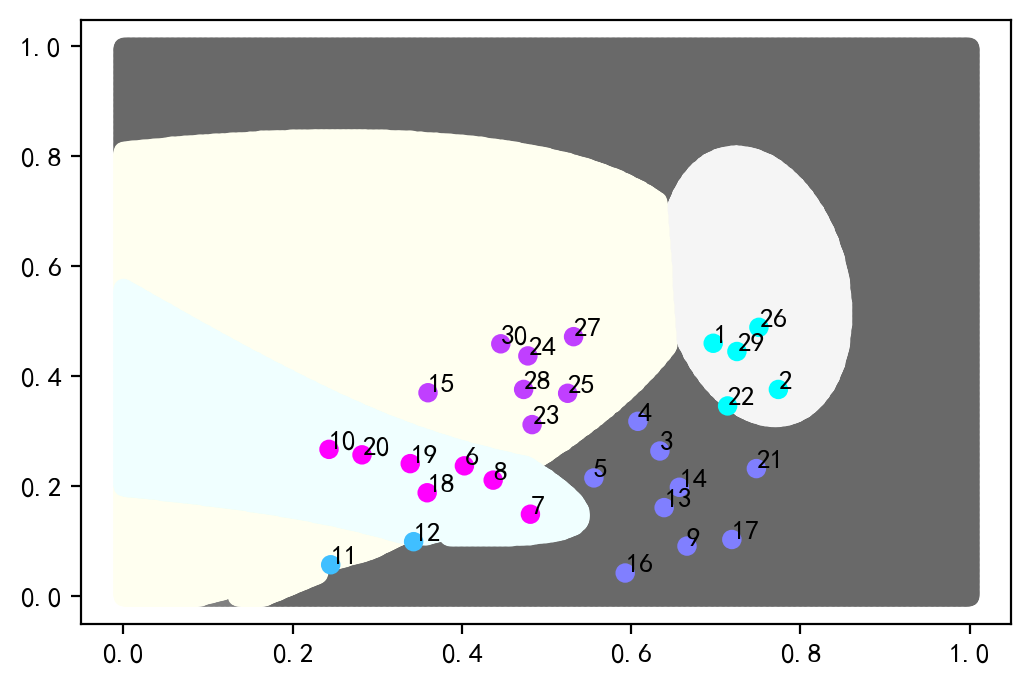

In [13]:
import  matplotlib
import  matplotlib.pyplot as plt
%matplotlib inline
matplotlib.rcParams['figure.dpi']=200
matplotlib.rcParams['font.sans-serif']=['simhei']
matplotlib.rcParams['axes.unicode_minus'] = False
color_arr = ['whitesmoke','gray','dimgray','ivory','azure']
for group,color in zip(disp_by_group_np,color_arr):
    plt.scatter(group[:,0],group[:,1], c=color)
plt.scatter(x[:,0],x[:,1],c=x_predict,cmap='cool')
for index, xp in zip(range(1,1000), x):
    plt.annotate(index, xy=(xp[0],xp[1]))
plt.show()

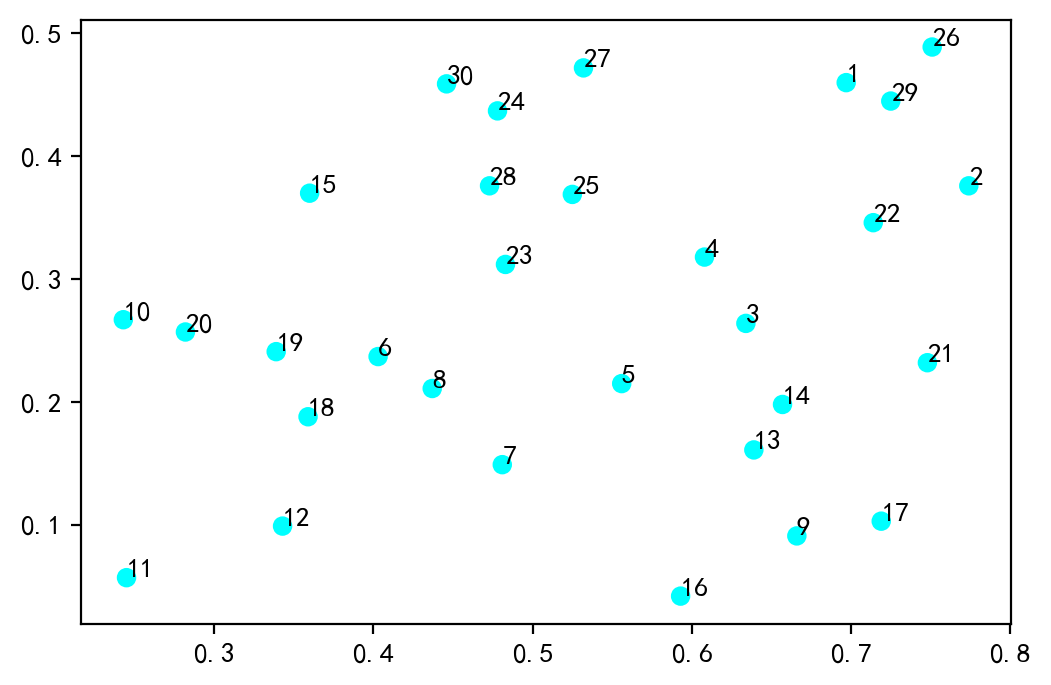

In [24]:
model = cluster.DBSCAN(eps=0.08,min_samples=N)
x_predict = model.fit_predict(x)
plt.scatter(x[:,0],x[:,1],c=x_predict,cmap='cool')
for index, xp in zip(range(1,1000), x):
    plt.annotate(index, xy=(xp[0],xp[1]))
plt.show()

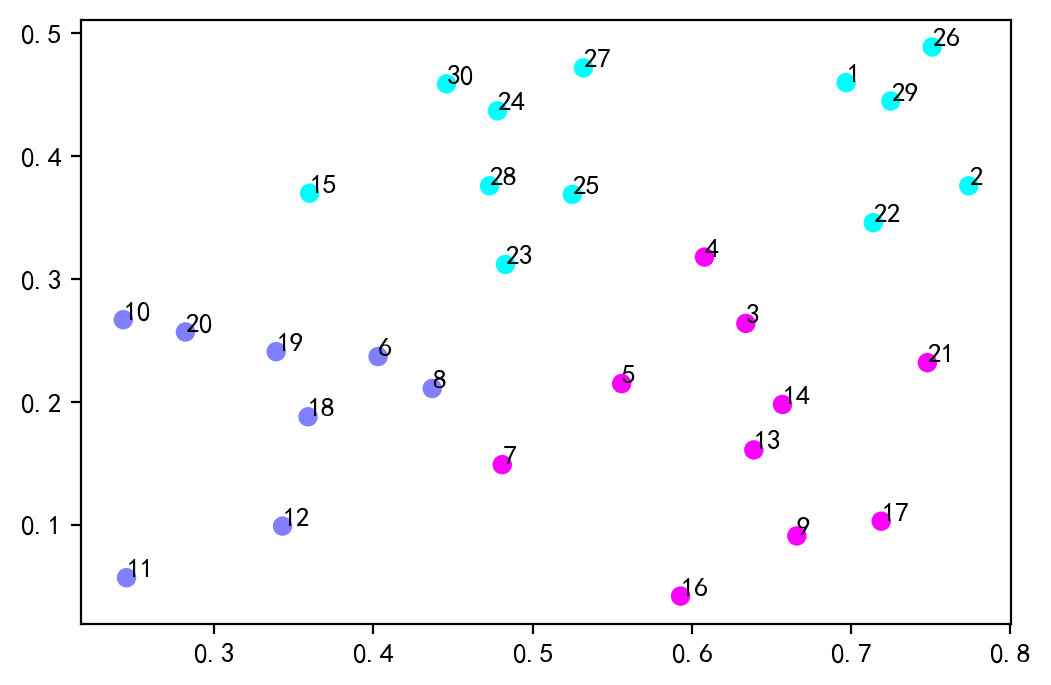

In [26]:
model = cluster.AgglomerativeClustering(n_clusters=3)
x_predict = model.fit_predict(x)
plt.scatter(x[:,0],x[:,1],c=x_predict,cmap='cool')
for index, xp in zip(range(1,1000), x):
    plt.annotate(index, xy=(xp[0],xp[1]))
plt.show()